In [72]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [73]:
# load the loan data from the csv file loan.csv
loan_data = pd.read_csv('loan.csv')


#https://drive.google.com/drive/folders/1Hv3bFzYiFWkmgHr0_8gov5yhiGdC8b5M?usp=sharing

## Read the data

In [74]:
# display the first five rows of the data 
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [75]:
# check the shape of the data
loan_data.shape

(39717, 111)

In [76]:
# Data Cleaning

In [77]:
# check the number of missing values present in the columm in the data
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [78]:
## We observe that some colums have only null values. Removing them first as they have provide no values during the analysis

In [79]:
# drop colums from dataframe which has all null values
loan_data.dropna(axis=1 , how= "all", inplace=True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


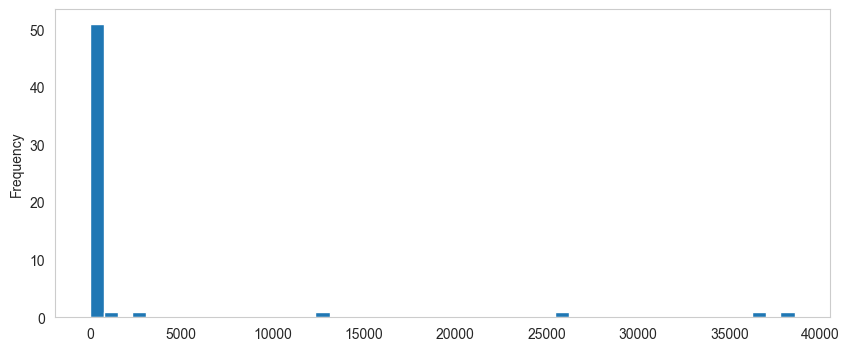

In [80]:
# check the columns with some missing values
count_of_missing_values_per_column = loan_data.isnull().sum()
count_of_missing_values_per_column.plot(kind='hist', bins=50, figsize = (10,4))
plt.show()

In [81]:
## from the above hist plot we can see that four column has more than 10000 null values in the data of 39717 rows. We obviously don't need such colums
count_of_missing_values_per_column.loc[(count_of_missing_values_per_column.values > 10000) & (count_of_missing_values_per_column.values < 39717)].sort_values()

desc                      12942
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

In [82]:
# droping the columns 
loan_data.drop(columns=list(count_of_missing_values_per_column[count_of_missing_values_per_column.values > 10000].index), inplace = True)
loan_data.shape

(39717, 53)

In [83]:
# check for the columns which has only single value in the data
unquie_value_count_per_colummn = loan_data.nunique()
single_valued_columns= unquie_value_count_per_colummn[unquie_value_count_per_colummn.values==1]
single_valued_columns.index


Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [84]:
# removing the columns from the data
loan_data.drop(columns=list(single_valued_columns.index),axis=1, inplace=True)
loan_data.shape


(39717, 44)

In [86]:
# dropping the columns which will not contribute in the analysis
columns_to_be_dropped = ["id", "member_id", "url"]
loan_data.drop(columns=columns_to_be_dropped,axis=1, inplace=True)
loan_data.shape


(39717, 41)

In [87]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

From above we can say that there are some customer behaviour variables that are not availbale at the time of loan application, and thus they cannot be used as prediction of crredit approval therefore we can remove those variables from our dataset.

In [88]:
#dropping customer behaviour columnS
loan_data.drop(['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc','open_acc', 'pub_rec','revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'], axis=1, inplace=True)
#checking shape
loan_data.shape

(39717, 21)

In [89]:
#analyzing unique value of loan_status column
loan_data["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [90]:
# From above, we can say that there are 3 distinct value but the loan status "Current" doesn't give any information for approving or rejecting loan application. So, we can drop the rows having value current.

In [91]:
#dropping rows having value current
loan_data = loan_data[loan_data["loan_status"] != 'Current']
#checking shape
loan_data.shape

(38577, 21)

In [92]:
#analyzing unique value of term column
loan_data["term"].unique()


array([' 36 months', ' 60 months'], dtype=object)

In [93]:
# We can see that there is a empty space at the start of the term values. So let's remove it.


In [94]:
#Stripping empty space in values in term
loan_data["term"] = loan_data.term.str.strip()
loan_data.term.unique()

array(['36 months', '60 months'], dtype=object)

In [95]:
# Looking for data duplicates
row, column = loan_data[loan_data.duplicated()].shape
print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')

There are no duplicates in the dataset.


# Data Manipulation

## Data type Conversion

In [96]:
#analyzing data type in each column
loan_data.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

#### issue_d are having date values, so we can convert the data type "object" to "date"

In [97]:
#converting to date type
loan_data['issue_d'] = pd.to_datetime(loan_data.issue_d, format='%b-%y')

In [98]:
# Derivng year attribute
loan_data['issue_year']=loan_data['issue_d'].dt.year

# Deriving month attribute
loan_data['issue_month']=loan_data['issue_d'].dt.month

In [99]:
#analysing int_rate and revol_util column
loan_data["int_rate"]

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38577, dtype: object

In [100]:
# Here we can observe that the column have "%" because of which it is showing data type - Object. So we can remove "%" and convert it into float data type.

In [101]:
#stripping '%' value and formating it to two decimal places
loan_data['int_rate'] = loan_data.int_rate.str.strip('%').astype(float)
loan_data['int_rate']= loan_data['int_rate'].apply(lambda x : round(x, 2))

In [102]:
# formating the values of funded_amnt_inv, installment, annual_inc, dti, pub_rec_bankruptcies
loan_data['funded_amnt_inv'] = loan_data['funded_amnt_inv'].apply(lambda x : round(x, 2))
loan_data['installment'] = loan_data['installment'].apply(lambda x : round(x, 2))
loan_data['annual_inc'] =loan_data['annual_inc'].apply(lambda x : round(x, 2))
loan_data['dti'] = loan_data['dti'].apply(lambda x : round(x, 2))
loan_data['pub_rec_bankruptcies'] =loan_data['pub_rec_bankruptcies'].apply(lambda x : round(x, 2))

In [103]:
# Correcting the datatypes 
loan_data.grade=loan_data.grade.astype('category')
loan_data.sub_grade=loan_data.sub_grade.astype('category')
loan_data.home_ownership=loan_data.home_ownership.astype('category')
loan_data.verification_status=loan_data.verification_status.astype('category')

# Outlier treatment

<Axes: xlabel='annual_inc'>

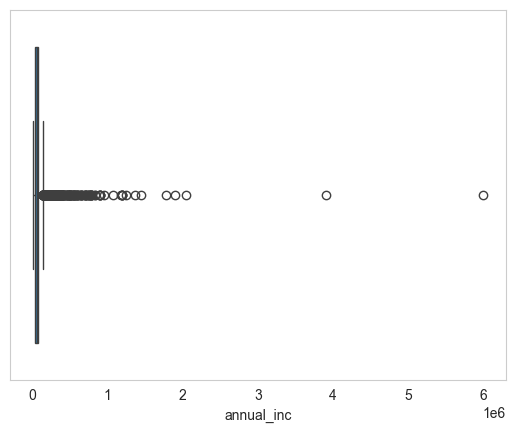

In [104]:
#analyse outliers in annual_inc using boxplot
sns.boxplot(data = loan_data, x='annual_inc')

In [105]:
#describing annual_inc column to get more insite
loan_data.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [106]:
loan_data.annual_inc.quantile([0.5, 0.75, 0.90, 0.95, 0.97, 0.98, 0.99])

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64


Clearly from above plot we can say that their is a presence of outlier. So let us remove the values after 95 percentile

In [107]:
annual_inc_percent_95 = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= annual_inc_percent_95]

<Axes: xlabel='annual_inc'>

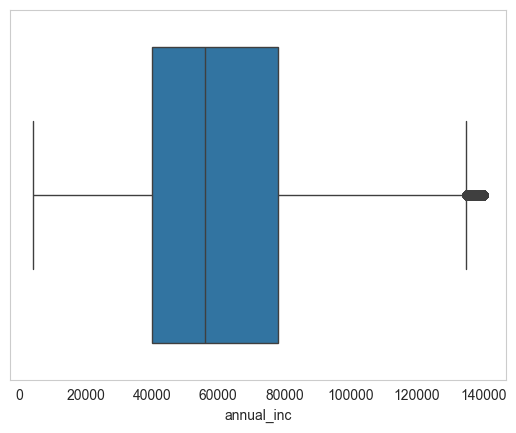

In [108]:
sns.boxplot(data = loan_data, x='annual_inc')

Now the "annual_inc" data looks good and proceeding to next.
Let's analyze other numerical variables which could possibly have outliers dti, loan_amnt, funded_amnt_inv

<Axes: xlabel='dti'>

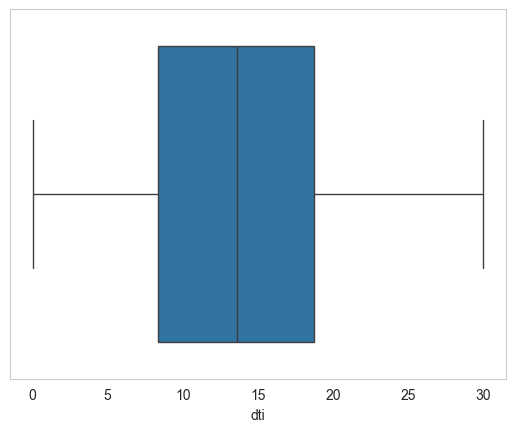

In [109]:
sns.boxplot(data = loan_data, x='dti')

<Axes: xlabel='loan_amnt'>

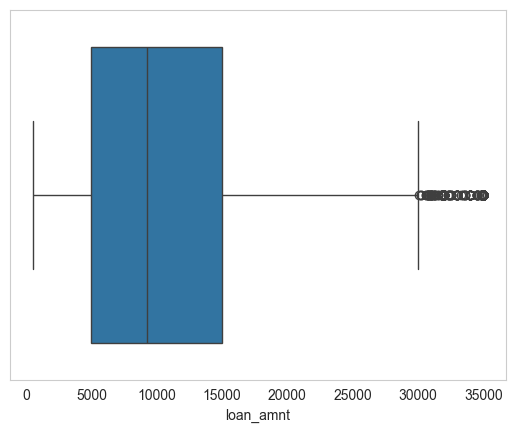

In [110]:
sns.boxplot(data = loan_data, x='loan_amnt')

In [111]:
loan_data.loan_amnt.quantile([0.5, 0.75, 0.90, 0.95, 0.97, 0.98, 0.99])

0.50     9250.0
0.75    15000.0
0.90    20000.0
0.95    25000.0
0.97    25475.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

<Axes: xlabel='funded_amnt_inv'>

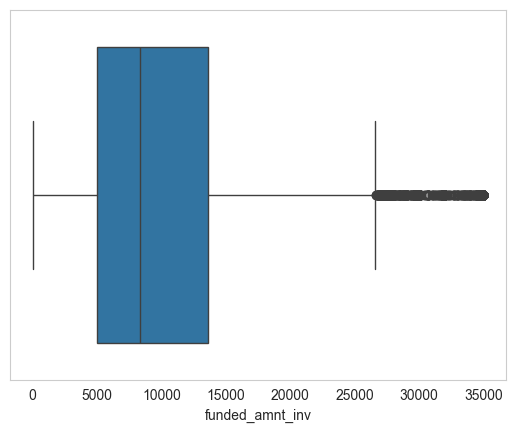

In [112]:
sns.boxplot(data = loan_data, x='funded_amnt_inv')

In [113]:
loan_data.funded_amnt_inv.quantile([0.5, 0.75, 0.90, 0.95, 0.97, 0.98, 0.99])

0.50     8375.0000
0.75    13623.7325
0.90    19750.0000
0.95    23941.8740
0.97    24975.0000
0.98    27950.0000
0.99    31954.0267
Name: funded_amnt_inv, dtype: float64

Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values for these above columns.

 # Univariate Analysis

In [114]:
#Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Setting style for seaonrn
sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

loan_status
Fully Paid     85.21853
Charged Off    14.78147
Name: count, dtype: float64


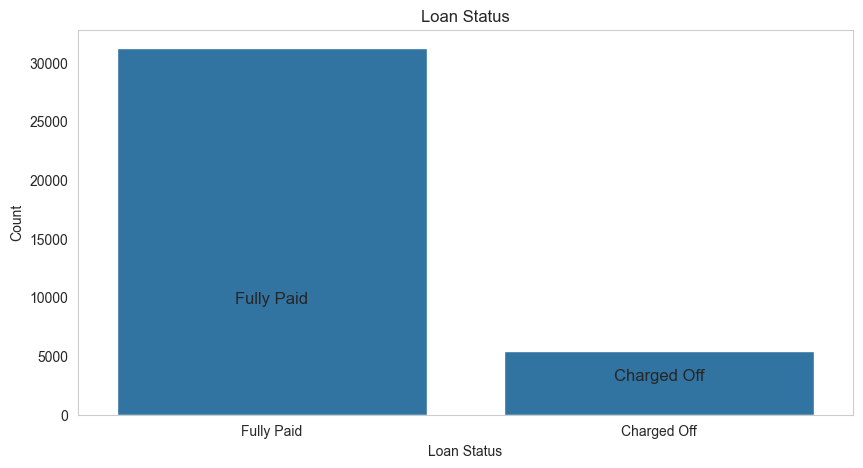

In [115]:
# Loan status 
print(loan_data.loan_status.value_counts()*100/loan_data.loan_status.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(loan_data, x='loan_status')
ax.annotate('Fully Paid',xy=(0.25,0.3),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12, )
ax.annotate('Charged Off',xy=(0.75,0.1),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.set_title('Loan Status')
ax.set_ylabel('Count')
ax.set_xlabel('Loan Status')
plt.show()

In [116]:
## Inference:Defaulted loan are low in numbers compared to Fully Paid.

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


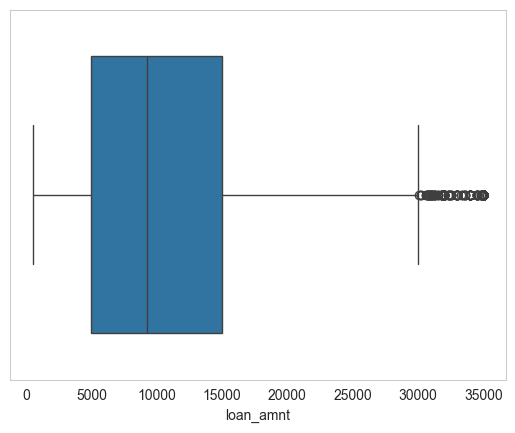

In [117]:
# Loan Amount
print(loan_data.loan_amnt.describe())
#Plotting histogram of loan amount
sns.boxplot(loan_data,x='loan_amnt', width= 0.75 )
plt.show()

In [118]:
# Inference: The loan amount varies from 500 to 35000 with a mode of 9250.

term
36 months    75.628854
60 months    24.371146
Name: count, dtype: float64


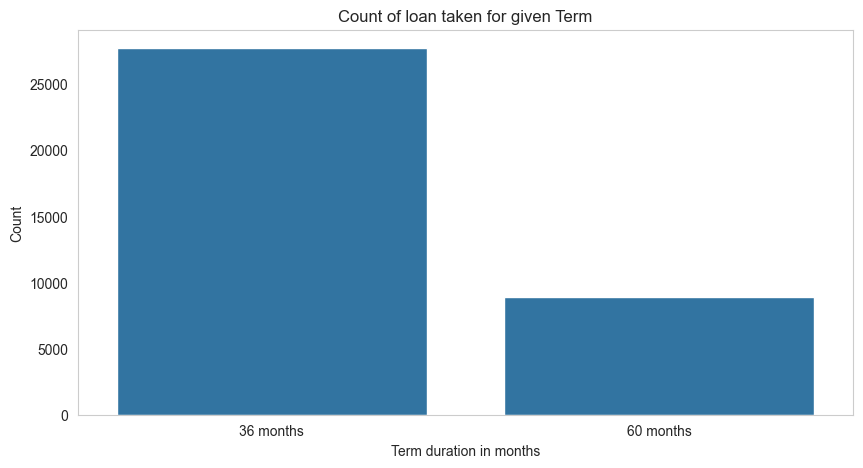

In [119]:
# Term of loan 
print(loan_data.term.value_counts()*100/loan_data.term.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(loan_data, x= 'term')
ax.set_title('Count of loan taken for given Term')
ax.set_xlabel('Term duration in months')
ax.set_ylabel('Count')
plt.show()

In [120]:
# Inference: More than half of the loan taken has term of 36 months compared to 60 months.

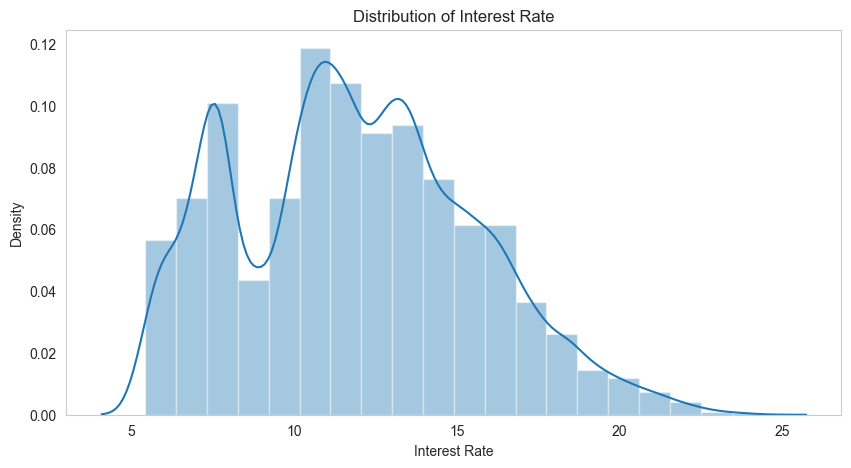

In [121]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(loan_data.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

In [122]:
#Inference: The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.

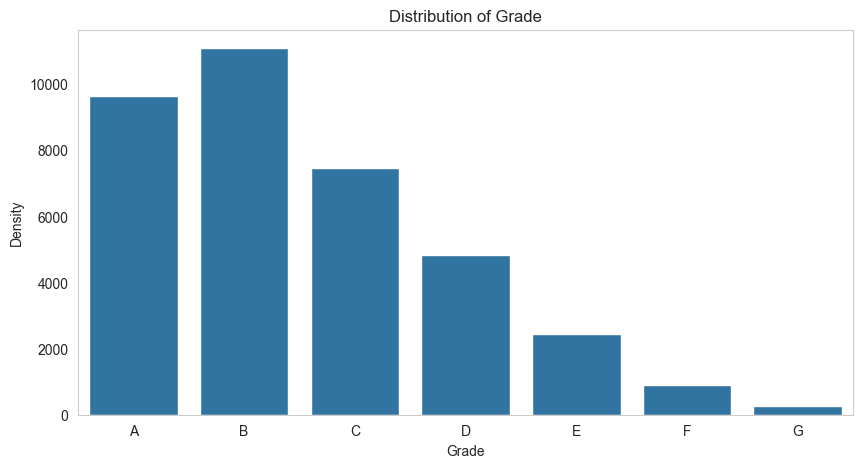

In [123]:
# Distribution of Grade
plt.figure(figsize=(10,5))
sns.countplot(loan_data, x='grade')
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Grade')
plt.show()

In [124]:
# Inference: A large amount of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.

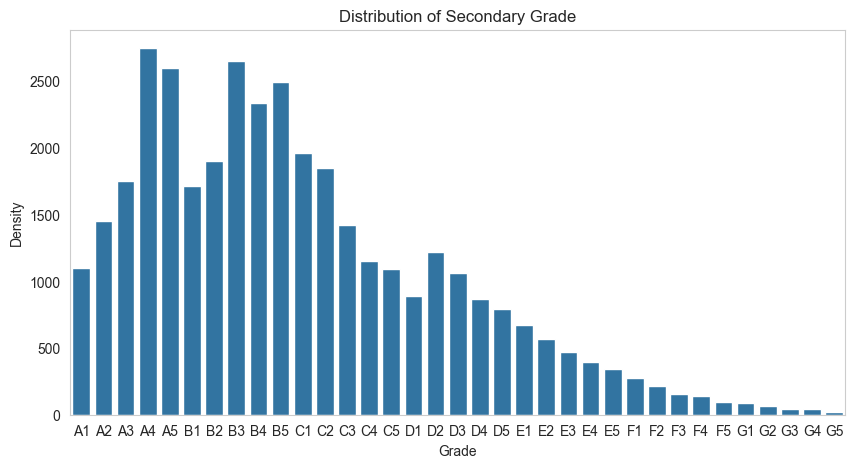

In [125]:
# Distribution of Sub Grade
plt.figure(figsize=(10,5))
sns.countplot(loan_data, x= 'sub_grade')
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Secondary Grade')
plt.show()

**Inference**: A large amount of loans are with lower subgrade in grade 'A' and 'B' commpared to rest showing most loans are high grade loans. This matches with the Grade distribution.

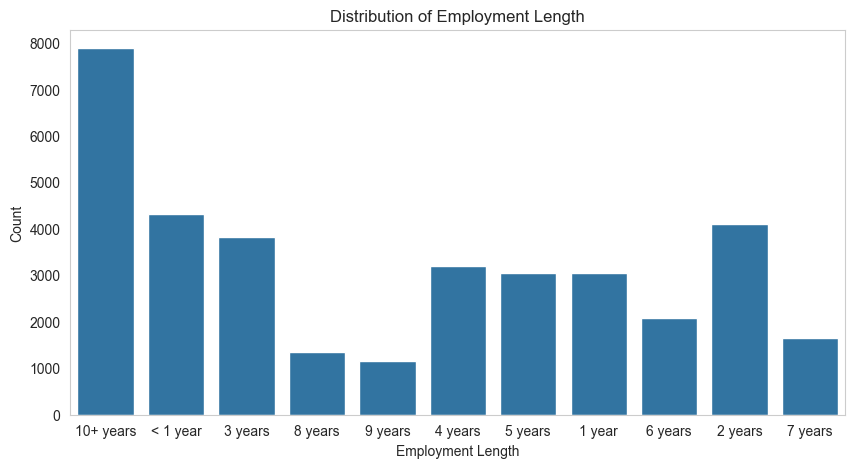

In [126]:
# Distribution of emp_length
plt.figure(figsize=(10,5))
sns.countplot(loan_data, x = 'emp_length')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length',fontsize=12)
plt.show()

**Inference**: Majority of borrowsers have working experience greater than 10 years.

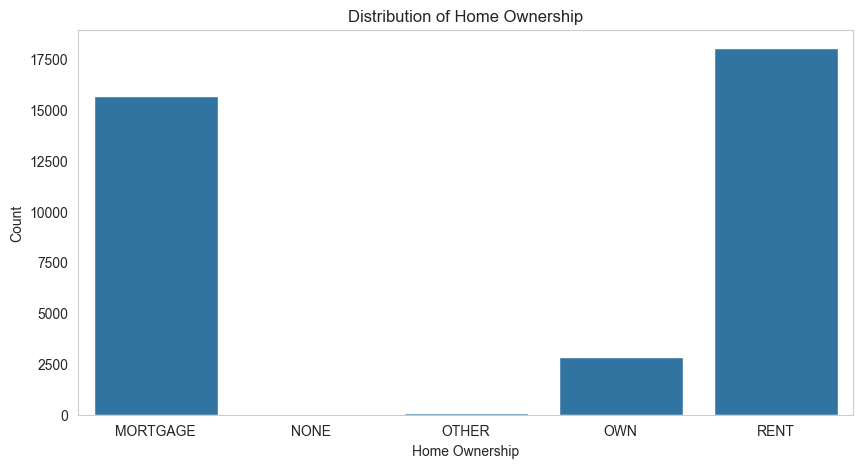

In [127]:
# Distribution of home_ownership
plt.figure(figsize=(10,5))
sns.countplot(loan_data, x= 'home_ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership',fontsize=12)
plt.show()

**Inference**: Majority of borrowsers don't posses property and are on mortage or rent.

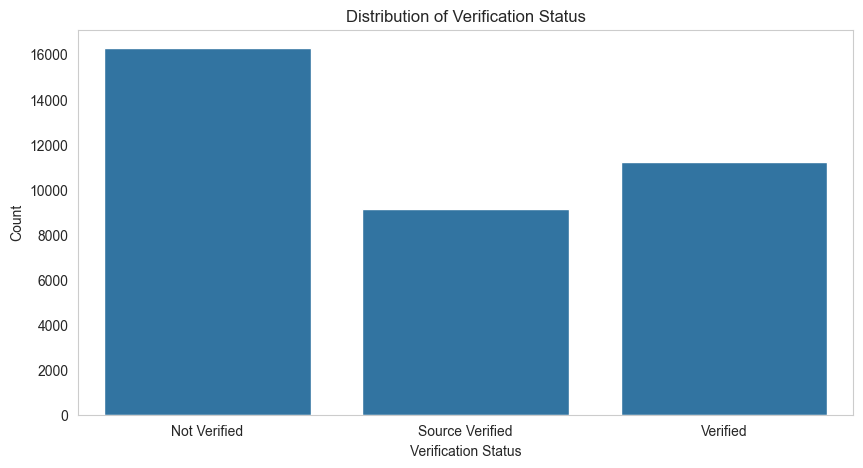

In [128]:
# Distribution of verification_status
plt.figure(figsize=(10,5))
sns.countplot(loan_data, x ='verification_status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification Status',fontsize=12)
plt.show()


**Inference**: About 50% of the borrowers are verified by the company or have source verified.

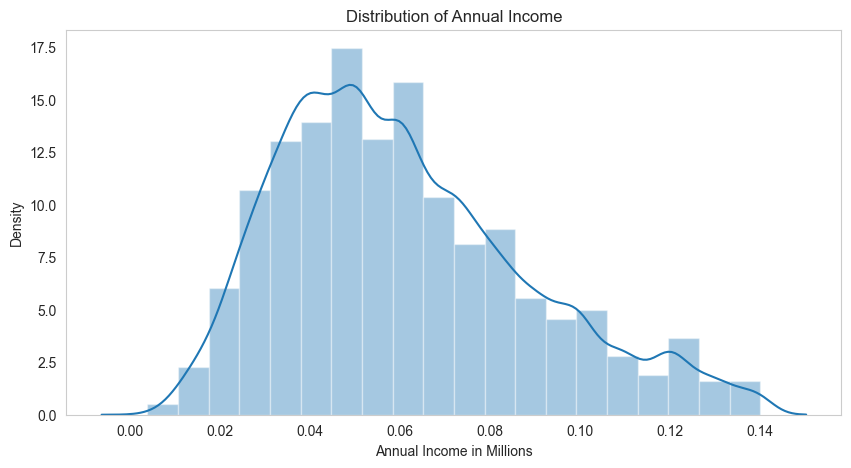

In [129]:
# Distribution of annual_inc
plt.figure(figsize=(10,5))
sns.distplot(loan_data.annual_inc/1000000,kde=True,bins=20)
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

**Inference**: Annual Income shows left skewed normal distribution thus we can say that the majority of burrowers have very low annual income compared to rest.

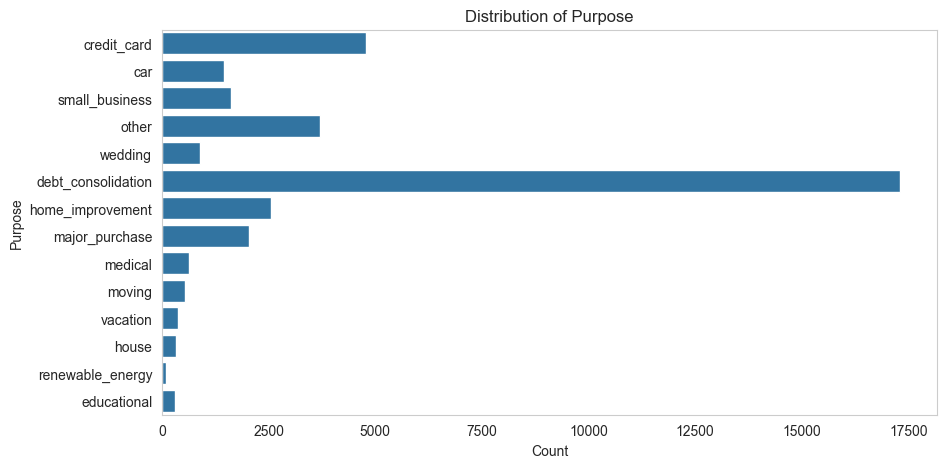

In [130]:
# Distribution of purpose
plt.figure(figsize=(10,5))
sns.countplot(y=loan_data.purpose)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)
plt.show()

**Inference**: A large percentage of loans are taken for debt consolidation followed by credit card.

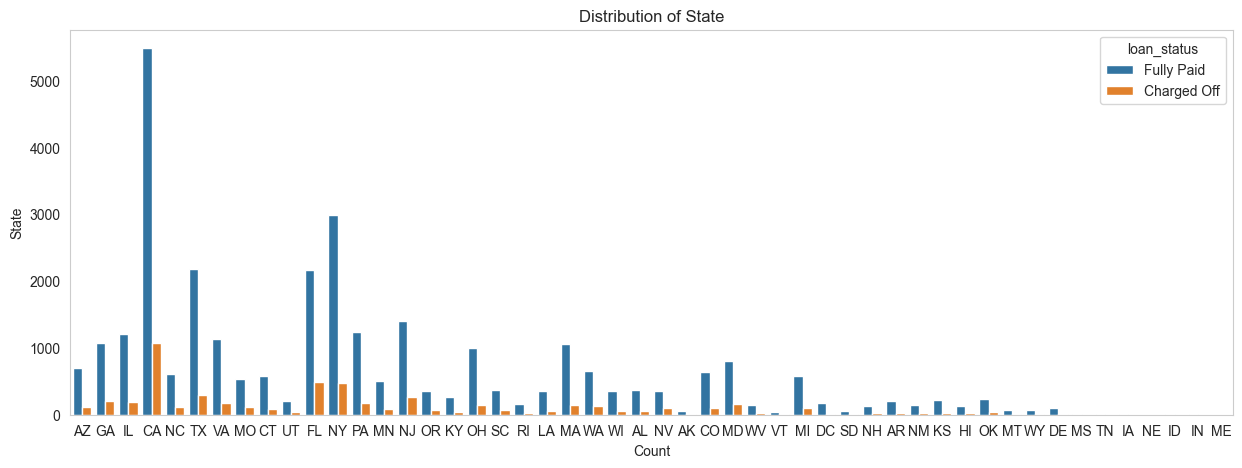

In [131]:
# Distribution of addr_state
plt.figure(figsize=(15,5))
sns.countplot(loan_data, x = 'addr_state',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Distribution of State',fontsize=12)
plt.show()

**Inference**: Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.

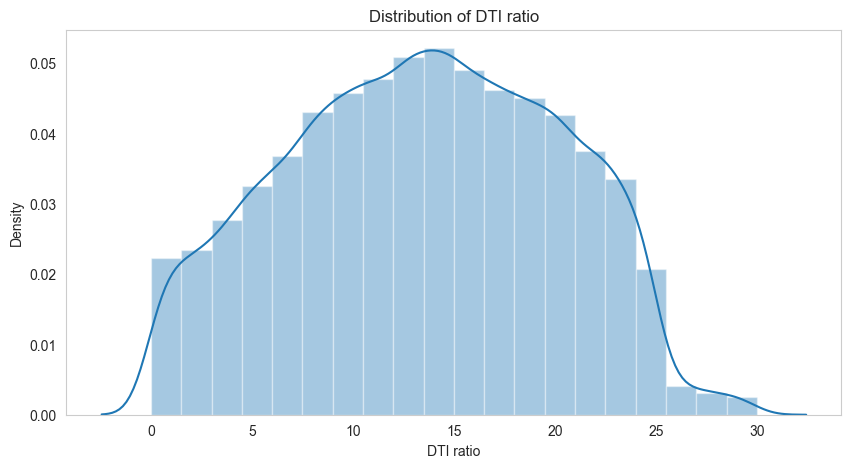

In [132]:
# Distribution of dti
plt.figure(figsize=(10,5))
sns.distplot(loan_data.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

Inference: Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.

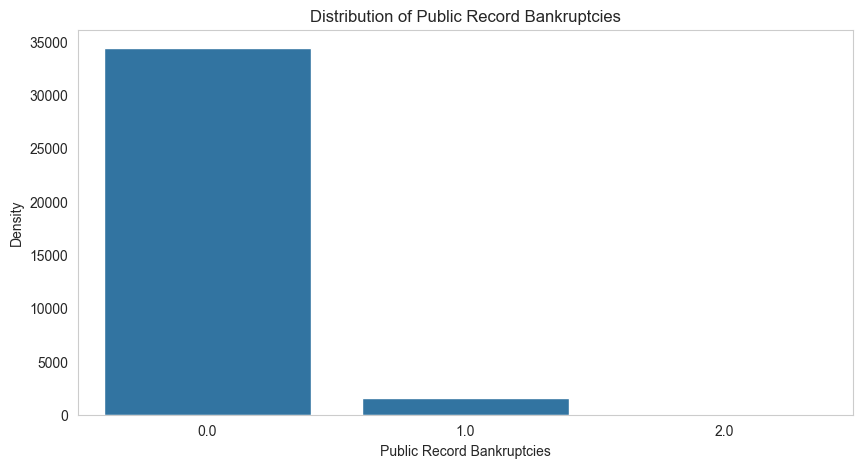

In [133]:
# Distribution of pub_rec_bankruptcies
plt.figure(figsize=(10,5))
sns.countplot(loan_data, x='pub_rec_bankruptcies')
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Density')
plt.title('Distribution of Public Record Bankruptcies',fontsize=12)
plt.show()

Inference: Majority of the borrowers have no record of Public Recorded Bankruptcy.

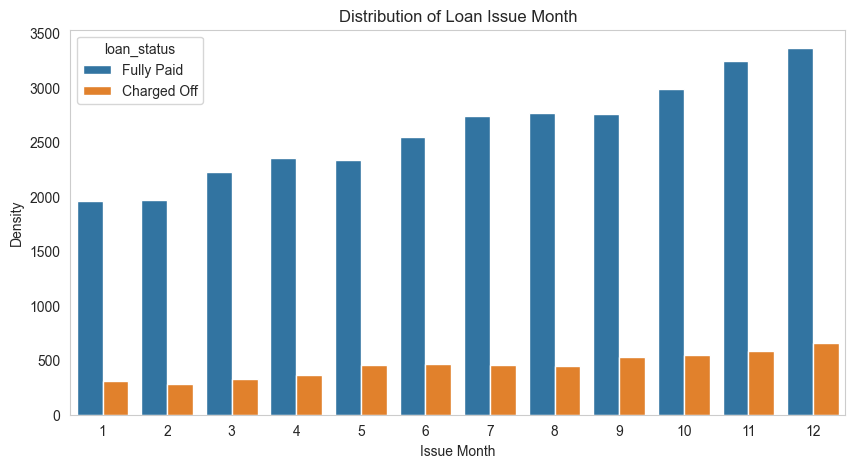

In [134]:
# Distribution of issue_month
plt.figure(figsize=(10,5))
sns.countplot(loan_data, x= 'issue_month', hue='loan_status')
plt.xlabel('Issue Month')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Month',fontsize=12)
plt.show()

Inference: Majority of the loans are given in last quarter of the year.

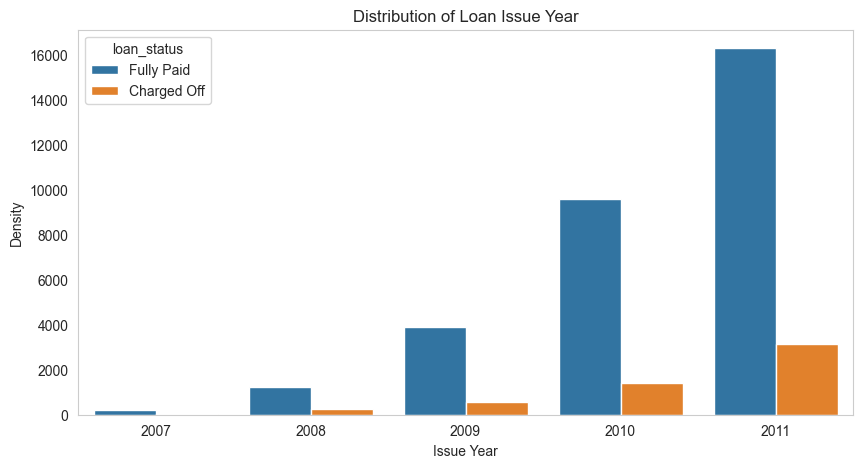

In [135]:
# Distribution of issue_year
plt.figure(figsize=(10,5))
sns.countplot(loan_data , x= 'issue_year', hue='loan_status')
plt.xlabel('Issue Year')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Year',fontsize=12)
plt.show()

Inference: The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

# Segmented Univariate Analysis

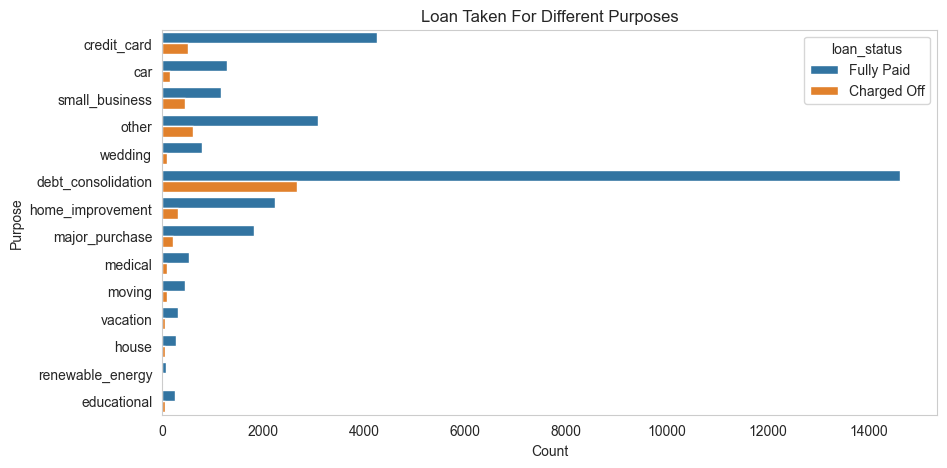

In [136]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

Inference: Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

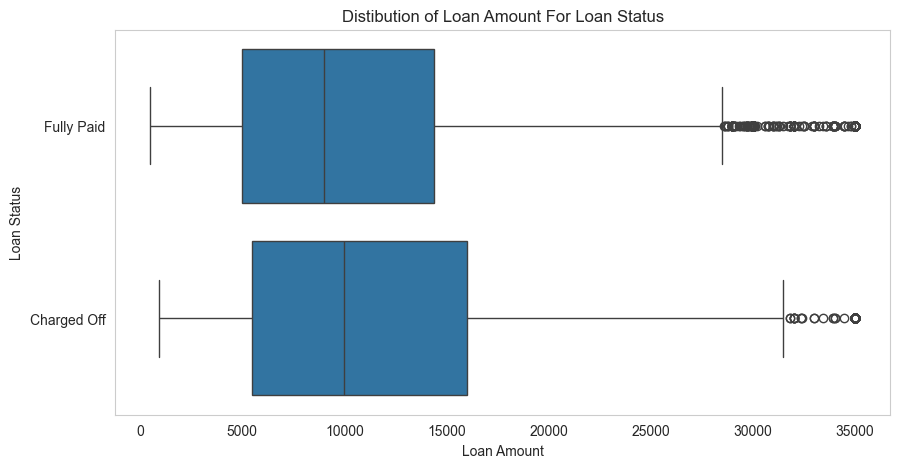

In [137]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_data,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()


Inference: The mean and 25% percentile are same for both but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.

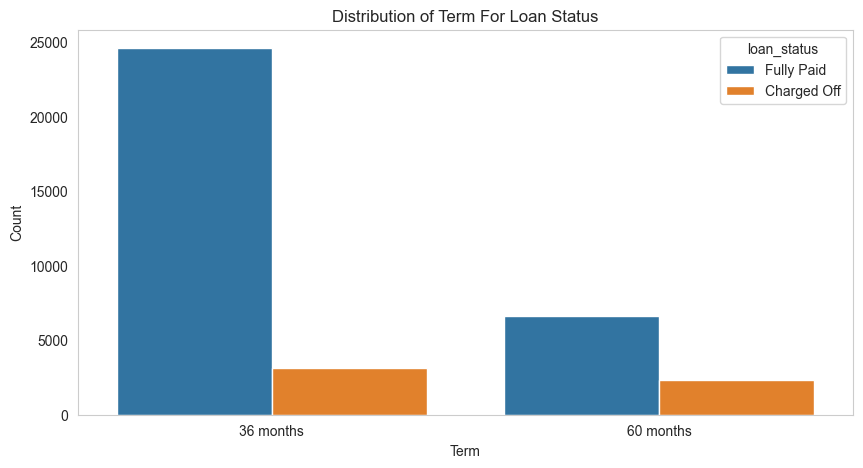

In [138]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

Inference: The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.

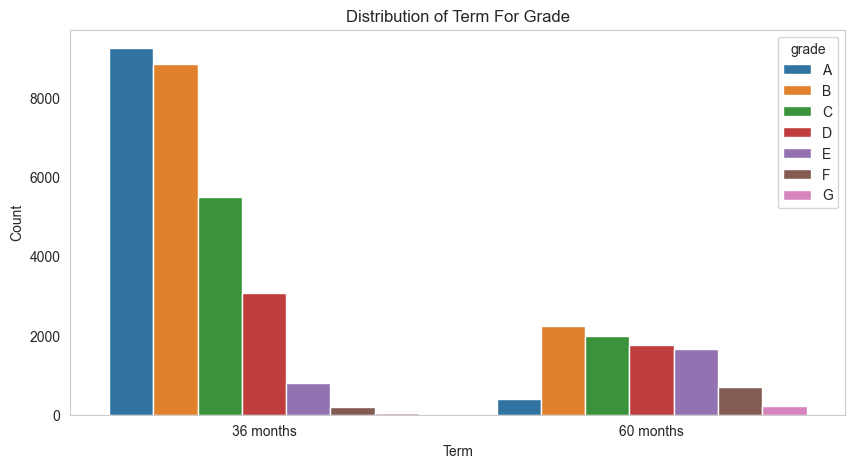

In [139]:
# Distribution of Term based on Grade
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade',fontsize=12)
plt.show()

Inference: The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.

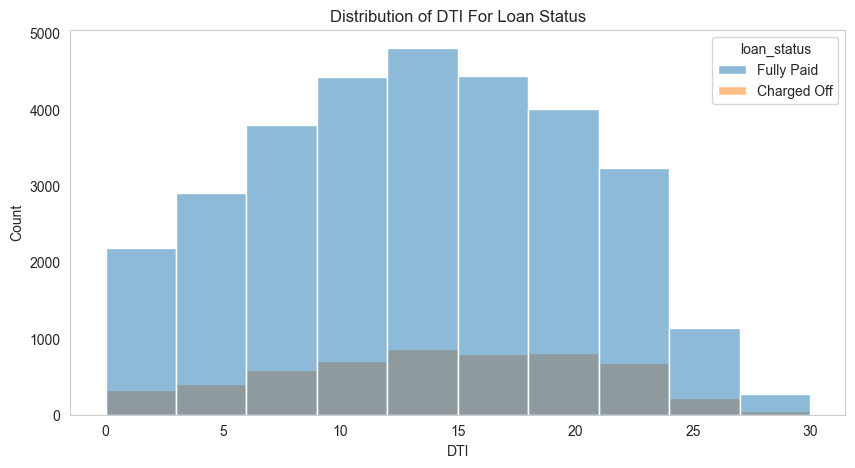

In [140]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

Inference: The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.

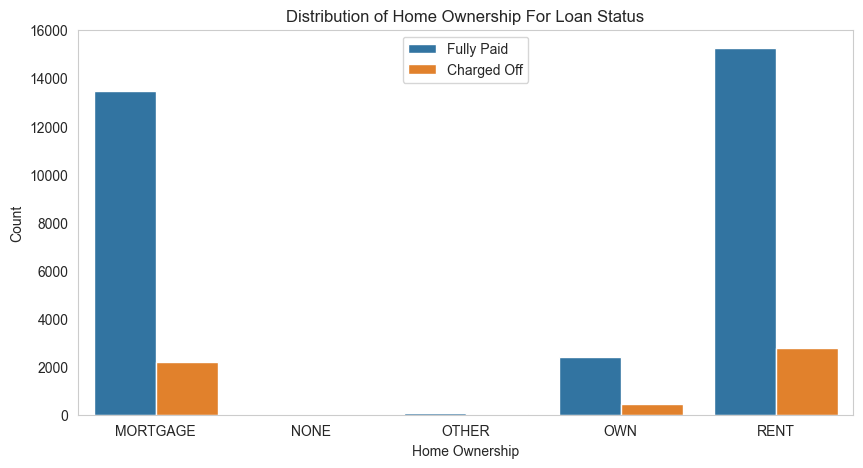

In [141]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

Inference: The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.

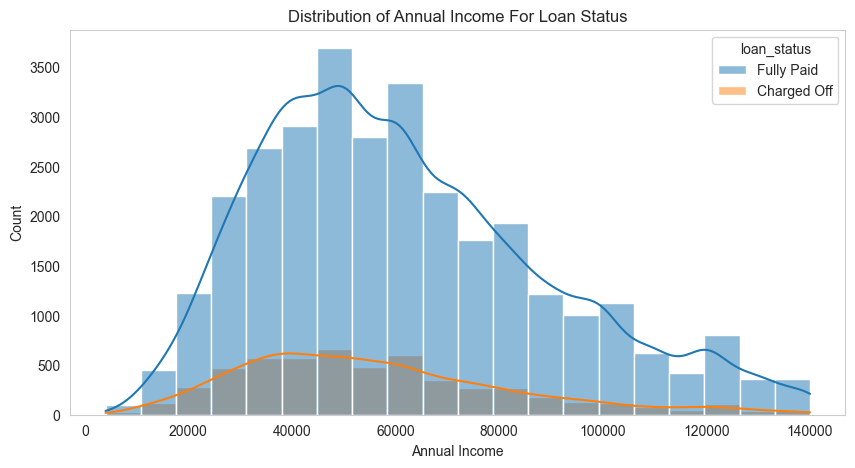

In [142]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()


Inference: Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.

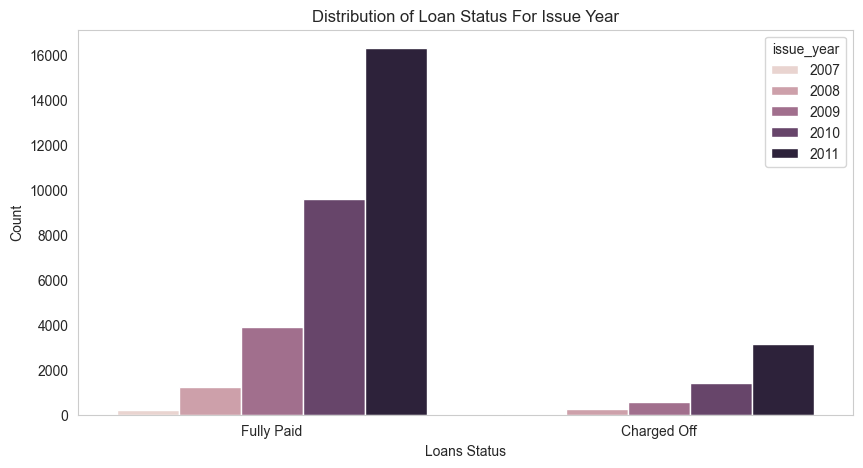

In [143]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='loan_status',hue='issue_year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status For Issue Year',fontsize=12)
plt.show()

Inference: The Fully paid loan are increasing exponentially with the time compared to defaulted loan.

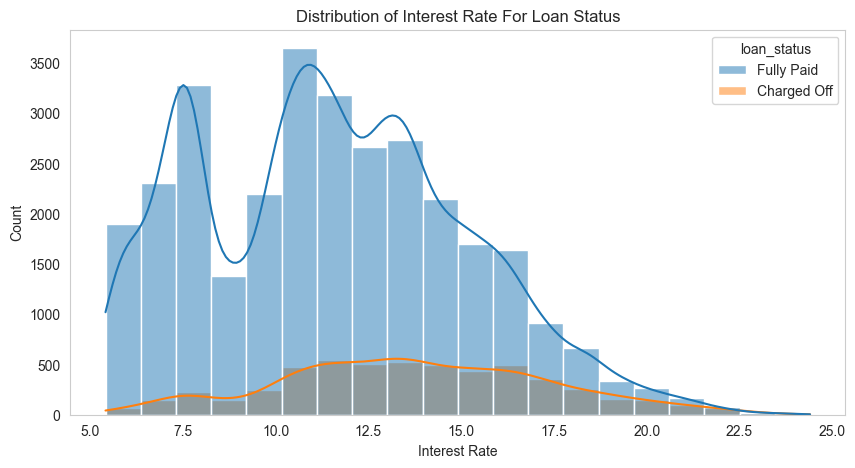

In [144]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

Inference: The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.

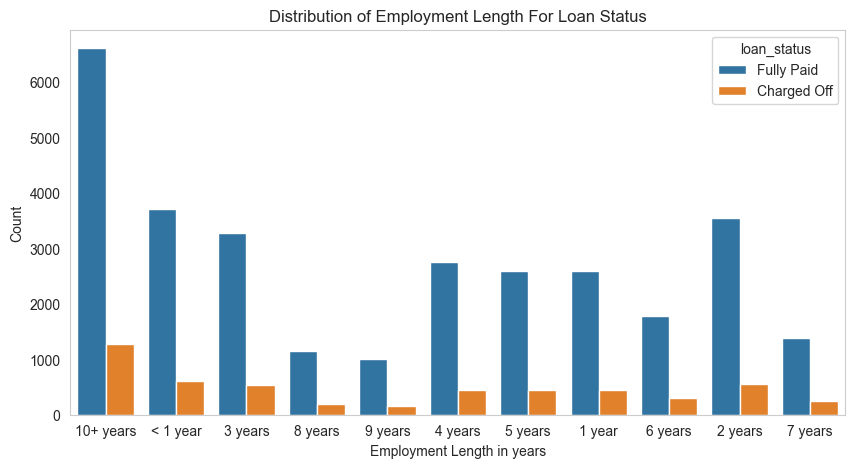

In [145]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()


Inference: The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

# Bivariate Analysis

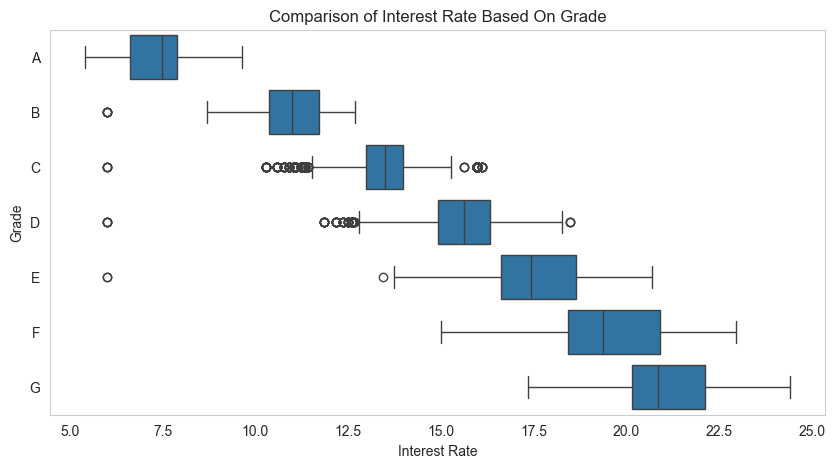

In [146]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_data,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

Inference: The Grade represent risk factor thus we can say interst rate increases with the risk.

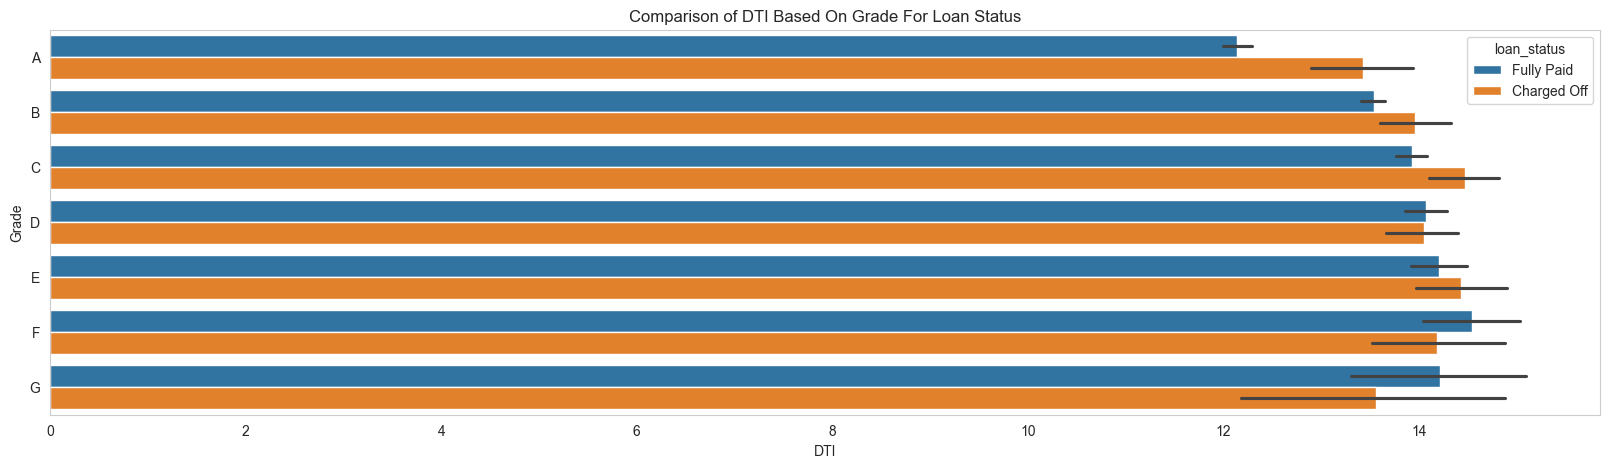

In [147]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(20,5))
sns.barplot(data=loan_data,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=12)
plt.show()

Inference: The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.

<Figure size 1500x500 with 0 Axes>

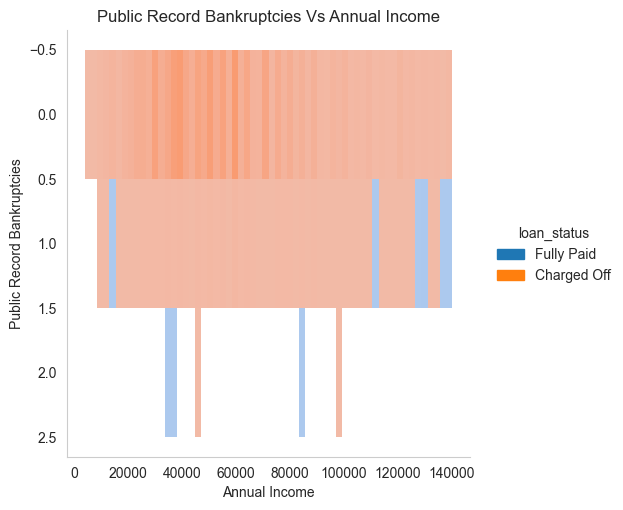

In [148]:
# Comparison of annual income to public record bankruptcy over loan status
plt.figure(figsize=(15,5))
sns.displot(y=loan_data.pub_rec_bankruptcies.astype('category'),x=loan_data.annual_inc,hue=loan_data.loan_status)
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.title('Public Record Bankruptcies Vs Annual Income',fontsize=12)
plt.show()

Inference: The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

## Insights
### Univariate Analysis
 - The number of defaulted loan is 7 times less than the number of fully paid loan.
 - The majority of loan has a term of 36 months compared to 60 months.
 - The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.
 - A large amoutn of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.
 - Majority of borrowsers have working experience greater than 10 years.
 - Majority of borrowsers don't posses property and are on mortage or rent.
 - About 50% of the borrowers are verified by the company or have source verified.
 - Annual Income shows left skewed normal distribution thus we can say that the majorityof burrowers have very low annual income compared to rest.
 - A large percentage of loans are taken for debt consolidation followed by credit card.
 - Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.
 - Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.
 - Majority of the borrowers have no record of Public Recorded Bankruptcy.
 - Majority of the loans are given in last quarter of the year.
 - The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

### Segmented Univariate Analysis
 - Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.
 - The mean and 25% are same for both but we see larger 75% in the defaulted loan which indicate large amount of loan has higher chance of defaulting.
 - The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.
 - The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.
 - The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.
 - The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.
 - Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.
 - The Fully paid loan are increasing exponentially with the time compared to defaulted loan.
 - The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.
 - The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

### Bivariate Analysis
 - The Grade represent risk factor thus we can say interst rate increases with the risk.
 - The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.
 - The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

Recommendations
- Major Driving factor which can be used to predict the chance of defaulting and avoiding Credit Loss:
    1. DTI 
    2. Grades
    3. Verification Status
    4. Annual income
    5. Pub_rec_bankruptcies
- Other considerations for 'defaults' :
    1. Burrowers not from large urban cities like california, new york, texas, florida etc. 
    2. Burrowers having annual income in the range 50000-100000.
    3. Burrowers having Public Recorded Bankruptcy.
    4. Burrowers with least grades like E,F,G which indicates high risk.
    5. Burrowers with very high Debt to Income value.
    6. Burrowers with working experience 10+ years.